## Milestone Three: Cleaning/Formatting Website Data

In [258]:
# First I will import some needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chardet
from bs4 import BeautifulSoup
import requests

## Import Wikipedia table data

In [259]:
url="https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/United_States_medical_cases"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify()) 
# print the parsed data of html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Template:COVID-19 pandemic data/United States medical cases - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"eeebce79-3a92-43bf-ae3c-2bea3f4660fc","wgCSPNonce":!1,"wgCanonicalNamespace":"Template","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":10,"wgPageName":"Template:COVID-19_pandemic_data/United_States_medical_cases","wgTitle":"COVID-19 pandemic data/United States medical cases","wgCurRevisionId":1053946351,"wgRevisionId":1053946351,"wgArticleId":63242384,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Interlangu

In [260]:
# First I will create a variable to store the Wikipedia link then I will
# store the table class name so we can use soup.find to locate the wikitable
wiki_url = 'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/United_States_medical_cases'
table_name = "wikitable"
soup_table = soup.find('table', {'class':table_name})

In [261]:
# Next I will make a request code to get the library by passing the 
# WikiURL through the use of request.get. then use the html.parse method 
# which will parse through the content. 
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [262]:
# Next I will use the soup.find method to find the content based on the 
# soup table with the id. Then use the pandas library to read_html
# and provide the table.
Covid_table = soup.find('table', attrs={'id': soup_table})
df = pd.read_html(str(Covid_table))

In [263]:
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

       Date West                                                  ...  \
       Date   AK     AZ     CA    CO   HI    ID   MT    NM    NV  ...   
0  1-Jan-21  NaN  10060  47189  3064  241   NaN  NaN  1278  2315  ...   
1  2-Jan-21  801   8883  53341  2011  169  1122  389  1237  1825  ...   
2  3-Jan-21  290  17234  45352  2078  149   308  437  1015  2747  ...   
3  4-Jan-21  260   5158  29633  2185   89   798  283   921  1414  ...   
4  5-Jan-21  194   5932  31440  3458  123  1538  714  1184  2423  ...   

  Territories           Date Confirmed           Deaths         Recovered  \
           PR   VI    Date.1     Daily     Total  Daily   Total     Daily   
0         677  NaN  1-Jan-21    174071  19179864   2444  329311     50035   
1         835    6  2-Jan-21    258867  19438731   2252  331563    185546   
2         237  NaN  3-Jan-21    207306  19646037   1370  332933     75571   
3         558   13  4-Jan-21    165938  19811975   1608  334541    299554   
4         501   28  5-Jan-

In [264]:
# Next I will print the table
df

Date    West                                                     \
          Date      AK       AZ       CA      CO      HI      ID       MT   
0     1-Jan-21     NaN    10060    47189    3064     241     NaN      NaN   
1     2-Jan-21     801     8883    53341    2011     169    1122      389   
2     3-Jan-21     290    17234    45352    2078     149     308      437   
3     4-Jan-21     260     5158    29633    2185      89     798      283   
4     5-Jan-21     194     5932    31440    3458     123    1538      714   
5     6-Jan-21     328     7206    29892    2557     142    1263      682   
6     7-Jan-21     326     9913    36385    3473     321    1067      690   
7     8-Jan-21     403    11658    50030    3187     264    1085      818   
8     9-Jan-21     311    11094    52636    2837     248     977      534   
9    10-Jan-21     250    11201    49685    2201     198     432      222   
10   11-Jan-21     173     8995    39839    1677     172     572      329   
11   12-Jan-21     121     8559    36487    1511     114    1034      424   
12   13-Jan-21     285     5629    33751    2438     106    1091      576   
13   14-Jan-21     332     7311    35930    2403     175     994      457   
14   15-Jan-21     300     9146    42655    2281     150    1112      525   
15   16-Jan-21     182     8715    40622    2025     165     806      421   
16   17-Jan-21     279     6981    42229    1498     130     278      337   
17   18-Jan-21     151     5400    30699    1190     129     NaN      183   
18   19-Jan-21     125     6417    23794    1685      64    1224      288   
19   20-Jan-21     160     4845    22403    1371      74     810      391   
20   21-Jan-21     209     9398    19673    1983     119     612      394   
21   22-Jan-21     263     8099    23024    1798     131     598      400   
22   23-Jan-21     241     7316    22972    1958     133     527      361   
23   24-Jan-21     165     7217    24111    1319     151     181      242   
24   25-Jan-21      83     5321    27007    1177     121     527      164   
25   26-Jan-21      85     4748    17028    1158      64     559      344   
26   27-Jan-21     173     5918    16728    1638     103     620      371   
27   28-Jan-21     199     4671    16696    1441      99     508      403   
28   29-Jan-21     185     5028    19337    1722     115     635      312   
29   30-Jan-21     135     5119    18427    1595     115     328      516   
30   31-Jan-21     128     5025    18974    1163      82     NaN      187   
31    1-Feb-21      70     3741    15358     884      90     482      121   
32    2-Feb-21     107     2938    12064     935      64     491      314   
33    3-Feb-21     181     2296    10501    1269      74     507      426   
34    4-Feb-21     158     4417    13176    1584     106     402      301   
35    5-Feb-21     165     3826    14021    1863      99     404      347   
36    6-Feb-21     NaN     3471    12394    1541     107     240      259   
37    7-Feb-21     NaN     1544    15064    1034      75     NaN       73   
38    8-Feb-21     415     2250    10414     987      32     449      124   
39    9-Feb-21     115     4381     8251     934      31     437      374   
40   10-Feb-21     182     1977     8390     751      53     458      307   
41   11-Feb-21     143     1861     8575    1722      91     323      257   
42   12-Feb-21     148     2426    10059    2091      68     349      211   
43   13-Feb-21     NaN     1791     9421    1209      67     258      234   
44   14-Feb-21     NaN     1947     8842     853      46     NaN      104   
45   15-Feb-21     NaN     1338     6487     533      33     NaN      138   
46   16-Feb-21     454     1132     5692     668      17     462      127   
47   17-Feb-21      63     1315     4090    1137      29     408      234   
48   18-Feb-21     210     1143     5573    1241      65     286      200   
49   19-Feb-21     189     1918     6798    1280      48     314      277   
50   2

In [265]:
list_dataframe = pd.DataFrame(df)
print(list_dataframe)

          Date    West                                                     \
          Date      AK       AZ       CA      CO      HI      ID       MT   
0     1-Jan-21     NaN    10060    47189    3064     241     NaN      NaN   
1     2-Jan-21     801     8883    53341    2011     169    1122      389   
2     3-Jan-21     290    17234    45352    2078     149     308      437   
3     4-Jan-21     260     5158    29633    2185      89     798      283   
4     5-Jan-21     194     5932    31440    3458     123    1538      714   
5     6-Jan-21     328     7206    29892    2557     142    1263      682   
6     7-Jan-21     326     9913    36385    3473     321    1067      690   
7     8-Jan-21     403    11658    50030    3187     264    1085      818   
8     9-Jan-21     311    11094    52636    2837     248     977      534   
9    10-Jan-21     250    11201    49685    2201     198     432      222   
10   11-Jan-21     173     8995    39839    1677     172     572      329   

## Replace Headers

In [266]:
# First I will use list and .columns function with dataframe object to 
# pull a list of my dataframes headers. 
list(list_dataframe.columns)

[('Date', 'Date'),
 ('West', 'AK'),
 ('West', 'AZ'),
 ('West', 'CA'),
 ('West', 'CO'),
 ('West', 'HI'),
 ('West', 'ID'),
 ('West', 'MT'),
 ('West', 'NM'),
 ('West', 'NV'),
 ('West', 'OR'),
 ('West', 'UT'),
 ('West', 'WA'),
 ('West', 'WY'),
 ('Midwest', 'IA'),
 ('Midwest', 'IL'),
 ('Midwest', 'IN'),
 ('Midwest', 'KS'),
 ('Midwest', 'MI'),
 ('Midwest', 'MN'),
 ('Midwest', 'MO'),
 ('Midwest', 'ND'),
 ('Midwest', 'NE'),
 ('Midwest', 'OH'),
 ('Midwest', 'OK'),
 ('Midwest', 'SD'),
 ('Midwest', 'WI'),
 ('South', 'AL'),
 ('South', 'AR'),
 ('South', 'FL'),
 ('South', 'GA'),
 ('South', 'KY'),
 ('South', 'LA'),
 ('South', 'MS'),
 ('South', 'NC'),
 ('South', 'SC'),
 ('South', 'TN'),
 ('South', 'TX'),
 ('South', 'VA'),
 ('South', 'WV'),
 ('Northeast', 'CT'),
 ('Northeast', 'DC'),
 ('Northeast', 'DE'),
 ('Northeast', 'MA'),
 ('Northeast', 'MD'),
 ('Northeast', 'ME'),
 ('Northeast', 'NH'),
 ('Northeast', 'NJ'),
 ('Northeast', 'NY'),
 ('Northeast', 'PA'),
 ('Northeast', 'RI'),
 ('Northeast', 'VT'),
 (

In [267]:
# Next I will drop the first header column level
Covid_State_Data = list_dataframe.droplevel(0, axis=1)
Covid_State_Data.head()

Date   AK     AZ     CA    CO   HI    ID   MT    NM    NV  ...   PR  \
0  1-Jan-21  NaN  10060  47189  3064  241   NaN  NaN  1278  2315  ...  677   
1  2-Jan-21  801   8883  53341  2011  169  1122  389  1237  1825  ...  835   
2  3-Jan-21  290  17234  45352  2078  149   308  437  1015  2747  ...  237   
3  4-Jan-21  260   5158  29633  2185   89   798  283   921  1414  ...  558   
4  5-Jan-21  194   5932  31440  3458  123  1538  714  1184  2423  ...  501   

    VI    Date.1   Daily     Total Daily   Total   Daily     Total    Total  
0  NaN  1-Jan-21  174071  19179864  2444  329311   50035  12175841  6674712  
1    6  2-Jan-21  258867  19438731  2252  331563  185546  12361387  6745781  
2  NaN  3-Jan-21  207306  19646037  1370  332933   75571  12436958  6876146  
3   13  4-Jan-21  165938  19811975  1608  334541  299554  12736512  6740922  
4   28  5-Jan-21  202188  20014163  3424  337965  125704  12862216  6813982  

[5 rows x 64 columns]

In [268]:
# Next I will reprint my header names and see what is remaining and 
# what I would like to update
list(Covid_State_Data.columns)

['Date',
 'AK',
 'AZ',
 'CA',
 'CO',
 'HI',
 'ID',
 'MT',
 'NM',
 'NV',
 'OR',
 'UT',
 'WA',
 'WY',
 'IA',
 'IL',
 'IN',
 'KS',
 'MI',
 'MN',
 'MO',
 'ND',
 'NE',
 'OH',
 'OK',
 'SD',
 'WI',
 'AL',
 'AR',
 'FL',
 'GA',
 'KY',
 'LA',
 'MS',
 'NC',
 'SC',
 'TN',
 'TX',
 'VA',
 'WV',
 'CT',
 'DC',
 'DE',
 'MA',
 'MD',
 'ME',
 'NH',
 'NJ',
 'NY',
 'PA',
 'RI',
 'VT',
 'GU',
 'MP',
 'PR',
 'VI',
 'Date.1',
 'Daily',
 'Total',
 'Daily',
 'Total',
 'Daily',
 'Total',
 'Total']

In [280]:
# Next I will create a column name for my duplicates for daily
column_name = {'Daily': ['Daily_Confirmed_Cases', 'Daily_Deaths', 'Daily_Recovered']}

In [281]:
# Next I will use rename to update the names of my daily duplicate columns
Covid_Data = Covid_State_Data.rename(columns=lambda c: column_name[c].pop(0) if c in column_name.keys() else c)

In [282]:
# Next I will create a column name for my duplicates for total
Total_column_name = {'Total': ['Total_Confirmed_Cases', 'Total_Deaths', 'Total_Recovered', 'Total_Active']}

In [283]:
# Next I will use rename to update the names of my total duplicate columns
Covid_Data = Covid_Data.rename(columns=lambda c: Total_column_name[c].pop(0) if c in Total_column_name.keys() else c)

In [284]:
Covid_Data

Date      AK       AZ       CA      CO      HI      ID       MT  \
0     1-Jan-21     NaN    10060    47189    3064     241     NaN      NaN   
1     2-Jan-21     801     8883    53341    2011     169    1122      389   
2     3-Jan-21     290    17234    45352    2078     149     308      437   
3     4-Jan-21     260     5158    29633    2185      89     798      283   
4     5-Jan-21     194     5932    31440    3458     123    1538      714   
5     6-Jan-21     328     7206    29892    2557     142    1263      682   
6     7-Jan-21     326     9913    36385    3473     321    1067      690   
7     8-Jan-21     403    11658    50030    3187     264    1085      818   
8     9-Jan-21     311    11094    52636    2837     248     977      534   
9    10-Jan-21     250    11201    49685    2201     198     432      222   
10   11-Jan-21     173     8995    39839    1677     172     572      329   
11   12-Jan-21     121     8559    36487    1511     114    1034      424   
12   13-Jan-21     285     5629    33751    2438     106    1091      576   
13   14-Jan-21     332     7311    35930    2403     175     994      457   
14   15-Jan-21     300     9146    42655    2281     150    1112      525   
15   16-Jan-21     182     8715    40622    2025     165     806      421   
16   17-Jan-21     279     6981    42229    1498     130     278      337   
17   18-Jan-21     151     5400    30699    1190     129     NaN      183   
18   19-Jan-21     125     6417    23794    1685      64    1224      288   
19   20-Jan-21     160     4845    22403    1371      74     810      391   
20   21-Jan-21     209     9398    19673    1983     119     612      394   
21   22-Jan-21     263     8099    23024    1798     131     598      400   
22   23-Jan-21     241     7316    22972    1958     133     527      361   
23   24-Jan-21     165     7217    24111    1319     151     181      242   
24   25-Jan-21      83     5321    27007    1177     121     527      164   
25   26-Jan-21      85     4748    17028    1158      64     559      344   
26   27-Jan-21     173     5918    16728    1638     103     620      371   
27   28-Jan-21     199     4671    16696    1441      99     508      403   
28   29-Jan-21     185     5028    19337    1722     115     635      312   
29   30-Jan-21     135     5119    18427    1595     115     328      516   
30   31-Jan-21     128     5025    18974    1163      82     NaN      187   
31    1-Feb-21      70     3741    15358     884      90     482      121   
32    2-Feb-21     107     2938    12064     935      64     491      314   
33    3-Feb-21     181     2296    10501    1269      74     507      426   
34    4-Feb-21     158     4417    13176    1584     106     402      301   
35    5-Feb-21     165     3826    14021    1863      99     404      347   
36    6-Feb-21     NaN     3471    12394    1541     107     240      259   
37    7-Feb-21     NaN     1544    15064    1034      75     NaN       73   
38    8-Feb-21     415     2250    10414     987      32     449      124   
39    9-Feb-21     115     4381     8251     934      31     437      374   
40   10-Feb-21     182     1977     8390     751      53     458      307   
41   11-Feb-21     143     1861     8575    1722      91     323      257   
42   12-Feb-21     148     2426    10059    2091      68     349      211   
43   13-Feb-21     NaN     1791     9421    1209      67     258      234   
44   14-Feb-21     NaN     1947     8842     853      46     NaN      104   
45   15-Feb-21     NaN     1338     6487     533      33     NaN      138   
46   16-Feb-21     454     1132     5692     668      17     462      127   
47   17-Feb-21      63     1315     4090    1137      29     408      234   
48   18-Feb-21     210     1143     5573    1241      65     286      200   
49   19-Feb-21     189     1918     6798    1280      48     314      277   
50   20-Feb-21     NaN     2047     6668    1117      59     227      264   
51   2

In [285]:
# Next I will pull a list of my dataframes headers again to see 
# the updated names. 
list(Covid_Data.columns)

['Date',
 'AK',
 'AZ',
 'CA',
 'CO',
 'HI',
 'ID',
 'MT',
 'NM',
 'NV',
 'OR',
 'UT',
 'WA',
 'WY',
 'IA',
 'IL',
 'IN',
 'KS',
 'MI',
 'MN',
 'MO',
 'ND',
 'NE',
 'OH',
 'OK',
 'SD',
 'WI',
 'AL',
 'AR',
 'FL',
 'GA',
 'KY',
 'LA',
 'MS',
 'NC',
 'SC',
 'TN',
 'TX',
 'VA',
 'WV',
 'CT',
 'DC',
 'DE',
 'MA',
 'MD',
 'ME',
 'NH',
 'NJ',
 'NY',
 'PA',
 'RI',
 'VT',
 'GU',
 'MP',
 'PR',
 'VI',
 'Date.1',
 'Daily_Confirmed_Cases',
 'Total_Confirmed_Cases',
 'Daily_Deaths',
 'Total_Deaths',
 'Daily_Recovered',
 'Total_Recovered',
 'Total_Active']

## Format data into a more readable format

In [286]:
# Next I will delete the column Date.1 being that this column is a 
# duplicate and is not needed. To perform this I will use the drop function
# and set inplace equal to true to allow us to confirm our changes 
Covid_Data.drop('Date.1', axis=1, inplace=True)

In [287]:
# As seen below we no longer have the column 'Date.1' but we do have rows
# at the tail or bottom of our dataframe that need to be removed.
Covid_Data.tail()

Date      AK       AZ       CA      CO      HI      ID       MT  \
319  6-Nov-21     NaN     3592      NaN     NaN      76     349      NaN   
320     Total      AK       AZ       CA      CO      HI      ID       MT   
321     Total  136822  1186477  4688285  760453   79912  296299   180452   
322     Notes     [a]      [b]      [c]     [d]     NaN     [e]      [f]   
323      Refs     [1]      [2]   [3][4]     [5]  [6][7]     [8]  [9][10]   

         NM        NV  ...        MP      PR    VI Daily_Confirmed_Cases  \
319     NaN       NaN  ...         7     121   NaN                 23829   
320      NM        NV  ...        MP      PR    VI             Confirmed   
321  282742    443641  ...       350  152170  7275              42358938   
322     [g]       [h]  ...      [ax]    [ay]   NaN                   NaN   
323    [11]  [12][13]  ...  [66][67]    [68]  [69]                   NaN   

    Total_Confirmed_Cases Daily_Deaths Total_Deaths Daily_Recovered  \
319              42358938          388       715775           42157   
320             Confirmed       Deaths       Deaths       Recovered   
321              42358938       715775       715775        37311666   
322                   NaN          NaN          NaN             NaN   
323                   NaN          NaN          NaN            [70]   

    Total_Recovered Total_Active  
319        37311666      4331497  
320       Recovered       Active  
321        37311666      4331497  
322             NaN          NaN  
323            [70]          NaN  

[5 rows x 63 columns]

In [288]:
Covid_Data

Date      AK       AZ       CA      CO      HI      ID       MT  \
0     1-Jan-21     NaN    10060    47189    3064     241     NaN      NaN   
1     2-Jan-21     801     8883    53341    2011     169    1122      389   
2     3-Jan-21     290    17234    45352    2078     149     308      437   
3     4-Jan-21     260     5158    29633    2185      89     798      283   
4     5-Jan-21     194     5932    31440    3458     123    1538      714   
5     6-Jan-21     328     7206    29892    2557     142    1263      682   
6     7-Jan-21     326     9913    36385    3473     321    1067      690   
7     8-Jan-21     403    11658    50030    3187     264    1085      818   
8     9-Jan-21     311    11094    52636    2837     248     977      534   
9    10-Jan-21     250    11201    49685    2201     198     432      222   
10   11-Jan-21     173     8995    39839    1677     172     572      329   
11   12-Jan-21     121     8559    36487    1511     114    1034      424   
12   13-Jan-21     285     5629    33751    2438     106    1091      576   
13   14-Jan-21     332     7311    35930    2403     175     994      457   
14   15-Jan-21     300     9146    42655    2281     150    1112      525   
15   16-Jan-21     182     8715    40622    2025     165     806      421   
16   17-Jan-21     279     6981    42229    1498     130     278      337   
17   18-Jan-21     151     5400    30699    1190     129     NaN      183   
18   19-Jan-21     125     6417    23794    1685      64    1224      288   
19   20-Jan-21     160     4845    22403    1371      74     810      391   
20   21-Jan-21     209     9398    19673    1983     119     612      394   
21   22-Jan-21     263     8099    23024    1798     131     598      400   
22   23-Jan-21     241     7316    22972    1958     133     527      361   
23   24-Jan-21     165     7217    24111    1319     151     181      242   
24   25-Jan-21      83     5321    27007    1177     121     527      164   
25   26-Jan-21      85     4748    17028    1158      64     559      344   
26   27-Jan-21     173     5918    16728    1638     103     620      371   
27   28-Jan-21     199     4671    16696    1441      99     508      403   
28   29-Jan-21     185     5028    19337    1722     115     635      312   
29   30-Jan-21     135     5119    18427    1595     115     328      516   
30   31-Jan-21     128     5025    18974    1163      82     NaN      187   
31    1-Feb-21      70     3741    15358     884      90     482      121   
32    2-Feb-21     107     2938    12064     935      64     491      314   
33    3-Feb-21     181     2296    10501    1269      74     507      426   
34    4-Feb-21     158     4417    13176    1584     106     402      301   
35    5-Feb-21     165     3826    14021    1863      99     404      347   
36    6-Feb-21     NaN     3471    12394    1541     107     240      259   
37    7-Feb-21     NaN     1544    15064    1034      75     NaN       73   
38    8-Feb-21     415     2250    10414     987      32     449      124   
39    9-Feb-21     115     4381     8251     934      31     437      374   
40   10-Feb-21     182     1977     8390     751      53     458      307   
41   11-Feb-21     143     1861     8575    1722      91     323      257   
42   12-Feb-21     148     2426    10059    2091      68     349      211   
43   13-Feb-21     NaN     1791     9421    1209      67     258      234   
44   14-Feb-21     NaN     1947     8842     853      46     NaN      104   
45   15-Feb-21     NaN     1338     6487     533      33     NaN      138   
46   16-Feb-21     454     1132     5692     668      17     462      127   
47   17-Feb-21      63     1315     4090    1137      29     408      234   
48   18-Feb-21     210     1143     5573    1241      65     286      200   
49   19-Feb-21     189     1918     6798    1280      48     314      277   
50   20-Feb-21     NaN     2047     6668    1117      59     227      264   
51   2

In [289]:
# I will remove the last four rows of the dataframe by dropping labels 
# 320 to 323 and then preview the last four rows to make sure the rows 
# we needed to delete have been deleted
Updated_Covid_Data = Covid_Data.drop([320,321,322,323], axis=0).tail(5)
Updated_Covid_Data

Date   AK    AZ    CA    CO   HI    ID    MT    NM   NV  ...  MP  \
315  2-Nov-21  491  2350  4209  2396   35   924  1138   674  895  ...  11   
316  3-Nov-21  667  2180  3518  2747  159  1244   866  1161  770  ...   1   
317  4-Nov-21  641  3552  5608  4149  100   662   790  1612  929  ...   9   
318  5-Nov-21  856  3813  8012  3306  112   803   682  1460  796  ...   4   
319  6-Nov-21  NaN  3592   NaN   NaN   76   349   NaN   NaN  NaN  ...   7   

      PR   VI Daily_Confirmed_Cases Total_Confirmed_Cases Daily_Deaths  \
315    8   27                 64025              42101654         1394   
316   62   18                 70097              42171751         1796   
317  115    9                 69763              42241514         1155   
318   45   15                 93595              42335109         2243   
319  121  NaN                 23829              42358938          388   

    Total_Deaths Daily_Recovered Total_Recovered Total_Active  
315       710193          120565        37000328      4391133  
316       711989          116276        37116604      4343158  
317       713144           77507        37194111      4334259  
318       715387           75398        37269509      4350213  
319       715775           42157        37311666      4331497  

[5 rows x 63 columns]

In [290]:
# As seen below the last four rows have been deleted.
Updated_Covid_Data.tail()

Date   AK    AZ    CA    CO   HI    ID    MT    NM   NV  ...  MP  \
315  2-Nov-21  491  2350  4209  2396   35   924  1138   674  895  ...  11   
316  3-Nov-21  667  2180  3518  2747  159  1244   866  1161  770  ...   1   
317  4-Nov-21  641  3552  5608  4149  100   662   790  1612  929  ...   9   
318  5-Nov-21  856  3813  8012  3306  112   803   682  1460  796  ...   4   
319  6-Nov-21  NaN  3592   NaN   NaN   76   349   NaN   NaN  NaN  ...   7   

      PR   VI Daily_Confirmed_Cases Total_Confirmed_Cases Daily_Deaths  \
315    8   27                 64025              42101654         1394   
316   62   18                 70097              42171751         1796   
317  115    9                 69763              42241514         1155   
318   45   15                 93595              42335109         2243   
319  121  NaN                 23829              42358938          388   

    Total_Deaths Daily_Recovered Total_Recovered Total_Active  
315       710193          120565        37000328      4391133  
316       711989          116276        37116604      4343158  
317       713144           77507        37194111      4334259  
318       715387           75398        37269509      4350213  
319       715775           42157        37311666      4331497  

[5 rows x 63 columns]

In [291]:
# Now I will use .set_option to display all rows so we can see if any
# other rows need to be deleted.
pd.set_option('display.max_rows', None)
Covid_Data

Date      AK       AZ       CA      CO      HI      ID       MT  \
0     1-Jan-21     NaN    10060    47189    3064     241     NaN      NaN   
1     2-Jan-21     801     8883    53341    2011     169    1122      389   
2     3-Jan-21     290    17234    45352    2078     149     308      437   
3     4-Jan-21     260     5158    29633    2185      89     798      283   
4     5-Jan-21     194     5932    31440    3458     123    1538      714   
5     6-Jan-21     328     7206    29892    2557     142    1263      682   
6     7-Jan-21     326     9913    36385    3473     321    1067      690   
7     8-Jan-21     403    11658    50030    3187     264    1085      818   
8     9-Jan-21     311    11094    52636    2837     248     977      534   
9    10-Jan-21     250    11201    49685    2201     198     432      222   
10   11-Jan-21     173     8995    39839    1677     172     572      329   
11   12-Jan-21     121     8559    36487    1511     114    1034      424   
12   13-Jan-21     285     5629    33751    2438     106    1091      576   
13   14-Jan-21     332     7311    35930    2403     175     994      457   
14   15-Jan-21     300     9146    42655    2281     150    1112      525   
15   16-Jan-21     182     8715    40622    2025     165     806      421   
16   17-Jan-21     279     6981    42229    1498     130     278      337   
17   18-Jan-21     151     5400    30699    1190     129     NaN      183   
18   19-Jan-21     125     6417    23794    1685      64    1224      288   
19   20-Jan-21     160     4845    22403    1371      74     810      391   
20   21-Jan-21     209     9398    19673    1983     119     612      394   
21   22-Jan-21     263     8099    23024    1798     131     598      400   
22   23-Jan-21     241     7316    22972    1958     133     527      361   
23   24-Jan-21     165     7217    24111    1319     151     181      242   
24   25-Jan-21      83     5321    27007    1177     121     527      164   
25   26-Jan-21      85     4748    17028    1158      64     559      344   
26   27-Jan-21     173     5918    16728    1638     103     620      371   
27   28-Jan-21     199     4671    16696    1441      99     508      403   
28   29-Jan-21     185     5028    19337    1722     115     635      312   
29   30-Jan-21     135     5119    18427    1595     115     328      516   
30   31-Jan-21     128     5025    18974    1163      82     NaN      187   
31    1-Feb-21      70     3741    15358     884      90     482      121   
32    2-Feb-21     107     2938    12064     935      64     491      314   
33    3-Feb-21     181     2296    10501    1269      74     507      426   
34    4-Feb-21     158     4417    13176    1584     106     402      301   
35    5-Feb-21     165     3826    14021    1863      99     404      347   
36    6-Feb-21     NaN     3471    12394    1541     107     240      259   
37    7-Feb-21     NaN     1544    15064    1034      75     NaN       73   
38    8-Feb-21     415     2250    10414     987      32     449      124   
39    9-Feb-21     115     4381     8251     934      31     437      374   
40   10-Feb-21     182     1977     8390     751      53     458      307   
41   11-Feb-21     143     1861     8575    1722      91     323      257   
42   12-Feb-21     148     2426    10059    2091      68     349      211   
43   13-Feb-21     NaN     1791     9421    1209      67     258      234   
44   14-Feb-21     NaN     1947     8842     853      46     NaN      104   
45   15-Feb-21     NaN     1338     6487     533      33     NaN      138   
46   16-Feb-21     454     1132     5692     668      17     462      127   
47   17-Feb-21      63     1315     4090    1137      29     408      234   
48   18-Feb-21     210     1143     5573    1241      65     286      200   
49   19-Feb-21     189     1918     6798    1280      48     314      277   
50   20-Feb-21     NaN     2047     6668    1117      59     227      264   
51   2

In [292]:
# From looking through the above dataframe it was noted that some rows 
# had duplicate headers from the top that ranged throughout the dataframe
# that I will remove the rows 59, 60, 122, 123, 185, 186, 249, 250, 312, 313, 320, 321, 322, 323 of 
# the dataframe by dropping labels 300 to 303 and then preview the last
# four rows to make sure the rows we needed to delete have been deleted
Covid_Data = Covid_Data.drop([59,60,122,123,185,186,249,250,312,313,320,321,322,323], axis=0)
Covid_Data

Date    AK     AZ     CA    CO    HI    ID    MT    NM    NV  ...  \
0     1-Jan-21   NaN  10060  47189  3064   241   NaN   NaN  1278  2315  ...   
1     2-Jan-21   801   8883  53341  2011   169  1122   389  1237  1825  ...   
2     3-Jan-21   290  17234  45352  2078   149   308   437  1015  2747  ...   
3     4-Jan-21   260   5158  29633  2185    89   798   283   921  1414  ...   
4     5-Jan-21   194   5932  31440  3458   123  1538   714  1184  2423  ...   
5     6-Jan-21   328   7206  29892  2557   142  1263   682  1485  1938  ...   
6     7-Jan-21   326   9913  36385  3473   321  1067   690  1835  3402  ...   
7     8-Jan-21   403  11658  50030  3187   264  1085   818  1637  2866  ...   
8     9-Jan-21   311  11094  52636  2837   248   977   534  1498  2648  ...   
9    10-Jan-21   250  11201  49685  2201   198   432   222  1203  2259  ...   
10   11-Jan-21   173   8995  39839  1677   172   572   329   930  1681  ...   
11   12-Jan-21   121   8559  36487  1511   114  1034   424   887  2593  ...   
12   13-Jan-21   285   5629  33751  2438   106  1091   576  1145  1143  ...   
13   14-Jan-21   332   7311  35930  2403   175   994   457  1424  2187  ...   
14   15-Jan-21   300   9146  42655  2281   150  1112   525  1262  1878  ...   
15   16-Jan-21   182   8715  40622  2025   165   806   421  1088  2040  ...   
16   17-Jan-21   279   6981  42229  1498   130   278   337   744  1483  ...   
17   18-Jan-21   151   5400  30699  1190   129   NaN   183   626  1221  ...   
18   19-Jan-21   125   6417  23794  1685    64  1224   288   691  1178  ...   
19   20-Jan-21   160   4845  22403  1371    74   810   391   881  1171  ...   
20   21-Jan-21   209   9398  19673  1983   119   612   394   988  1200  ...   
21   22-Jan-21   263   8099  23024  1798   131   598   400   908  1869  ...   
22   23-Jan-21   241   7316  22972  1958   133   527   361   848  1501  ...   
23   24-Jan-21   165   7217  24111  1319   151   181   242   626  1194  ...   
24   25-Jan-21    83   5321  27007  1177   121   527   164   491   990  ...   
25   26-Jan-21    85   4748  17028  1158    64   559   344   600   956  ...   
26   27-Jan-21   173   5918  16728  1638   103   620   371   751  1020  ...   
27   28-Jan-21   199   4671  16696  1441    99   508   403   672  1078  ...   
28   29-Jan-21   185   5028  19337  1722   115   635   312  1079  1328  ...   
29   30-Jan-21   135   5119  18427  1595   115   328   516   741  1070  ...   
30   31-Jan-21   128   5025  18974  1163    82   NaN   187   525   959  ...   
31    1-Feb-21    70   3741  15358   884    90   482   121   486   838  ...   
32    2-Feb-21   107   2938  12064   935    64   491   314   432   811  ...   
33    3-Feb-21   181   2296  10501  1269    74   507   426   670   750  ...   
34    4-Feb-21   158   4417  13176  1584   106   402   301   559   889  ...   
35    5-Feb-21   165   3826  14021  1863    99   404   347   582   897  ...   
36    6-Feb-21   NaN   3471  12394  1541   107   240   259   421   898  ...   
37    7-Feb-21   NaN   1544  15064  1034    75   NaN    73   342   651  ...   
38    8-Feb-21   415   2250  10414   987    32   449   124   311   548  ...   
39    9-Feb-21   115   4381   8251   934    31   437   374   413   546  ...   
40   10-Feb-21   182   1977   8390   751    53   458   307   510   659  ...   
41   11-Feb-21   143   1861   8575  1722    91   323   257   533   592  ...   
42   12-Feb-21   148   2426  10059  2091    68   349   211   401   636  ...   
43   13-Feb-21   NaN   1791   9421  1209    67   258   234   565   813  ...   
44   14-Feb-21   NaN   1947   8842   853    46   NaN   104   282   512  ...   
45   15-Feb-21   NaN   1338   6487   533    33   NaN   138   190   391  ...   
46   16-Feb-21   454   1132   5692   668    17   462   127   299   290  ...   
47   17-Feb-21    63   1315   4090  1137    29   408   234   272   363  ...   
48   18-Feb-21   210   1143   5573  1241    65   286   200   407   488  ...   
49   19-Feb-21   189   1918   6798  1280    48   314   277  

## Identify outliers and bad data

In [293]:
# First I will pull a list of my dataframes headers so I can have them
# easily available
list(Covid_Data.columns)

['Date',
 'AK',
 'AZ',
 'CA',
 'CO',
 'HI',
 'ID',
 'MT',
 'NM',
 'NV',
 'OR',
 'UT',
 'WA',
 'WY',
 'IA',
 'IL',
 'IN',
 'KS',
 'MI',
 'MN',
 'MO',
 'ND',
 'NE',
 'OH',
 'OK',
 'SD',
 'WI',
 'AL',
 'AR',
 'FL',
 'GA',
 'KY',
 'LA',
 'MS',
 'NC',
 'SC',
 'TN',
 'TX',
 'VA',
 'WV',
 'CT',
 'DC',
 'DE',
 'MA',
 'MD',
 'ME',
 'NH',
 'NJ',
 'NY',
 'PA',
 'RI',
 'VT',
 'GU',
 'MP',
 'PR',
 'VI',
 'Daily_Confirmed_Cases',
 'Total_Confirmed_Cases',
 'Daily_Deaths',
 'Total_Deaths',
 'Daily_Recovered',
 'Total_Recovered',
 'Total_Active']

In [294]:
# Next I will check and see if any of the columns conatin 
# NaNs by using the % operator
print("Does the 'Date'column contains NaN: %r " % Covid_Data.Date.isnull().values.any())
print("Does the 'AK'column contains NaN: %r " % Covid_Data.AK.isnull().values.any())
print("Does the 'AZ'column contains NaN: %r " % Covid_Data.AZ.isnull().values.any())
print("Does the 'CA'column contains NaN: %r " % Covid_Data.CA.isnull().values.any())
print("Does the 'CO'column contains NaN: %r " % Covid_Data.CO.isnull().values.any())
print("Does the 'HI'column contains NaN: %r " % Covid_Data.HI.isnull().values.any())
print("Does the 'ID'column contains NaN: %r " % Covid_Data.ID.isnull().values.any())
print("Does the 'MT'column contains NaN: %r " % Covid_Data.MT.isnull().values.any())
print("Does the 'NM'column contains NaN: %r " % Covid_Data.NM.isnull().values.any())
print("Does the 'NV'column contains NaN: %r " % Covid_Data.NV.isnull().values.any())
print("Does the 'OR'column contains NaN: %r " % Covid_Data.OR.isnull().values.any())

Does the 'Date'column contains NaN: False 
Does the 'AK'column contains NaN: True 
Does the 'AZ'column contains NaN: True 
Does the 'CA'column contains NaN: True 
Does the 'CO'column contains NaN: True 
Does the 'HI'column contains NaN: False 
Does the 'ID'column contains NaN: True 
Does the 'MT'column contains NaN: True 
Does the 'NM'column contains NaN: True 
Does the 'NV'column contains NaN: True 
Does the 'OR'column contains NaN: True 


As seen above our dataframe tells us that we have a almost all but two columns that I checked that have NaNs in them that we might be able to remove.

In [295]:
# Next I will create a new dataframe to remove outliers while not messing up my 
# original dataframe
Outlier_Covid_Data = Covid_Data
Outlier_Covid_Data.head()

Date   AK     AZ     CA    CO   HI    ID   MT    NM    NV  ...   MP  \
0  1-Jan-21  NaN  10060  47189  3064  241   NaN  NaN  1278  2315  ...  NaN   
1  2-Jan-21  801   8883  53341  2011  169  1122  389  1237  1825  ...  NaN   
2  3-Jan-21  290  17234  45352  2078  149   308  437  1015  2747  ...  NaN   
3  4-Jan-21  260   5158  29633  2185   89   798  283   921  1414  ...  NaN   
4  5-Jan-21  194   5932  31440  3458  123  1538  714  1184  2423  ...  NaN   

    PR   VI Daily_Confirmed_Cases Total_Confirmed_Cases Daily_Deaths  \
0  677  NaN                174071              19179864         2444   
1  835    6                258867              19438731         2252   
2  237  NaN                207306              19646037         1370   
3  558   13                165938              19811975         1608   
4  501   28                202188              20014163         3424   

  Total_Deaths Daily_Recovered Total_Recovered Total_Active  
0       329311           50035        12175841      6674712  
1       331563          185546        12361387      6745781  
2       332933           75571        12436958      6876146  
3       334541          299554        12736512      6740922  
4       337965          125704        12862216      6813982  

[5 rows x 63 columns]

In [296]:
# Next I will update all columns that are accepted to be numeric format
Outlier_Covid_Data = Outlier_Covid_Data.apply(pd.to_numeric, errors='ignore')
Outlier_Covid_Data

Date      AK       AZ       CA      CO    HI      ID      MT  \
0     1-Jan-21     NaN  10060.0  47189.0  3064.0   241     NaN     NaN   
1     2-Jan-21   801.0   8883.0  53341.0  2011.0   169  1122.0   389.0   
2     3-Jan-21   290.0  17234.0  45352.0  2078.0   149   308.0   437.0   
3     4-Jan-21   260.0   5158.0  29633.0  2185.0    89   798.0   283.0   
4     5-Jan-21   194.0   5932.0  31440.0  3458.0   123  1538.0   714.0   
5     6-Jan-21   328.0   7206.0  29892.0  2557.0   142  1263.0   682.0   
6     7-Jan-21   326.0   9913.0  36385.0  3473.0   321  1067.0   690.0   
7     8-Jan-21   403.0  11658.0  50030.0  3187.0   264  1085.0   818.0   
8     9-Jan-21   311.0  11094.0  52636.0  2837.0   248   977.0   534.0   
9    10-Jan-21   250.0  11201.0  49685.0  2201.0   198   432.0   222.0   
10   11-Jan-21   173.0   8995.0  39839.0  1677.0   172   572.0   329.0   
11   12-Jan-21   121.0   8559.0  36487.0  1511.0   114  1034.0   424.0   
12   13-Jan-21   285.0   5629.0  33751.0  2438.0   106  1091.0   576.0   
13   14-Jan-21   332.0   7311.0  35930.0  2403.0   175   994.0   457.0   
14   15-Jan-21   300.0   9146.0  42655.0  2281.0   150  1112.0   525.0   
15   16-Jan-21   182.0   8715.0  40622.0  2025.0   165   806.0   421.0   
16   17-Jan-21   279.0   6981.0  42229.0  1498.0   130   278.0   337.0   
17   18-Jan-21   151.0   5400.0  30699.0  1190.0   129     NaN   183.0   
18   19-Jan-21   125.0   6417.0  23794.0  1685.0    64  1224.0   288.0   
19   20-Jan-21   160.0   4845.0  22403.0  1371.0    74   810.0   391.0   
20   21-Jan-21   209.0   9398.0  19673.0  1983.0   119   612.0   394.0   
21   22-Jan-21   263.0   8099.0  23024.0  1798.0   131   598.0   400.0   
22   23-Jan-21   241.0   7316.0  22972.0  1958.0   133   527.0   361.0   
23   24-Jan-21   165.0   7217.0  24111.0  1319.0   151   181.0   242.0   
24   25-Jan-21    83.0   5321.0  27007.0  1177.0   121   527.0   164.0   
25   26-Jan-21    85.0   4748.0  17028.0  1158.0    64   559.0   344.0   
26   27-Jan-21   173.0   5918.0  16728.0  1638.0   103   620.0   371.0   
27   28-Jan-21   199.0   4671.0  16696.0  1441.0    99   508.0   403.0   
28   29-Jan-21   185.0   5028.0  19337.0  1722.0   115   635.0   312.0   
29   30-Jan-21   135.0   5119.0  18427.0  1595.0   115   328.0   516.0   
30   31-Jan-21   128.0   5025.0  18974.0  1163.0    82     NaN   187.0   
31    1-Feb-21    70.0   3741.0  15358.0   884.0    90   482.0   121.0   
32    2-Feb-21   107.0   2938.0  12064.0   935.0    64   491.0   314.0   
33    3-Feb-21   181.0   2296.0  10501.0  1269.0    74   507.0   426.0   
34    4-Feb-21   158.0   4417.0  13176.0  1584.0   106   402.0   301.0   
35    5-Feb-21   165.0   3826.0  14021.0  1863.0    99   404.0   347.0   
36    6-Feb-21     NaN   3471.0  12394.0  1541.0   107   240.0   259.0   
37    7-Feb-21     NaN   1544.0  15064.0  1034.0    75     NaN    73.0   
38    8-Feb-21   415.0   2250.0  10414.0   987.0    32   449.0   124.0   
39    9-Feb-21   115.0   4381.0   8251.0   934.0    31   437.0   374.0   
40   10-Feb-21   182.0   1977.0   8390.0   751.0    53   458.0   307.0   
41   11-Feb-21   143.0   1861.0   8575.0  1722.0    91   323.0   257.0   
42   12-Feb-21   148.0   2426.0  10059.0  2091.0    68   349.0   211.0   
43   13-Feb-21     NaN   1791.0   9421.0  1209.0    67   258.0   234.0   
44   14-Feb-21     NaN   1947.0   8842.0   853.0    46     NaN   104.0   
45   15-Feb-21     NaN   1338.0   6487.0   533.0    33     NaN   138.0   
46   16-Feb-21   454.0   1132.0   5692.0   668.0    17   462.0   127.0   
47   17-Feb-21    63.0   1315.0   4090.0  1137.0    29   408.0   234.0   
48   18-Feb-21   210.0   1143.0   5573.0  1241.0    65   286.0   200.0   
49   19-Feb-21   189.0   1918.0   6798.0  1280.0    48   314.0   277.0   
50   20-Feb-21     NaN   2047.0   6668.0  1117.0    59   227.0   264.0   
51   21-Feb-21     NaN   1804.0   6760.0   802.0    67     NaN   138.0   
52   22-Feb-21   309.0   1507.0   4665.0   680.0    49   404.0    31.0   
53   23-Feb-21

In [297]:
# Now I will use the shape function to get rid of outliers by using 
# the row Total_Recovered.
shape_Covid_Data = Outlier_Covid_Data.shape
updated_shape_Covid_Data = Outlier_Covid_Data[np.isfinite(Outlier_Covid_Data['Total_Recovered'])]
Covid_Updted_data = updated_shape_Covid_Data.shape

In [299]:
# Next I will print the size difference for the original data and 
# new data after the outliers have been removed by using the format
# function and prev and after. 
print("The original data was: {prev[0]} rows".format(prev=shape_Covid_Data))
print("The new data is: {after[0]} rows".format(after=Covid_Updted_data))

The original data was: 310 rows
The new data is: 310 rows


<AxesSubplot:title={'center':'Total_Recovered'}, xlabel='Date'>

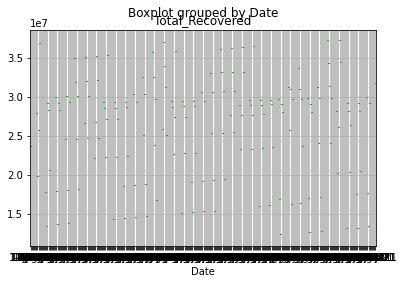

In [300]:
# Next I will create a box plot to check for outliers
updated_shape_Covid_Data.boxplot(by ='Date', column ='Total_Recovered')

As seen from original data and new data it doesn't seem like we have any outliers as this data is the infected rate, death rate, and recovery rate of individuals that contracte the Covid-19 Virus. I will need to take a look at this further into this report and see if any changes need to be made.

## Find duplicates

In [301]:
# First I will pull a list of my dataframes headers so I can have them
# easily available
list(Covid_Data.columns)

['Date',
 'AK',
 'AZ',
 'CA',
 'CO',
 'HI',
 'ID',
 'MT',
 'NM',
 'NV',
 'OR',
 'UT',
 'WA',
 'WY',
 'IA',
 'IL',
 'IN',
 'KS',
 'MI',
 'MN',
 'MO',
 'ND',
 'NE',
 'OH',
 'OK',
 'SD',
 'WI',
 'AL',
 'AR',
 'FL',
 'GA',
 'KY',
 'LA',
 'MS',
 'NC',
 'SC',
 'TN',
 'TX',
 'VA',
 'WV',
 'CT',
 'DC',
 'DE',
 'MA',
 'MD',
 'ME',
 'NH',
 'NJ',
 'NY',
 'PA',
 'RI',
 'VT',
 'GU',
 'MP',
 'PR',
 'VI',
 'Daily_Confirmed_Cases',
 'Total_Confirmed_Cases',
 'Daily_Deaths',
 'Total_Deaths',
 'Daily_Recovered',
 'Total_Recovered',
 'Total_Active']

In [302]:
# I will search and see if any of the columns have duplicate data 
# by using the format and duplicate function to state if the request is true or false
print("Is the 'Date' duplictaed: {}".format(any(updated_shape_Covid_Data.Date.duplicated())))
print("Is the 'AK' duplictaed: {}".format(any(updated_shape_Covid_Data.AK.duplicated())))
print("Is the 'AZ' duplictaed: {}".format(any(updated_shape_Covid_Data.AZ.duplicated())))
print("Is the 'CA' duplictaed: {}".format(any(updated_shape_Covid_Data.CA.duplicated())))
print("Is the 'Daily_Confirmed_Cases' duplictaed: {}".format(any(updated_shape_Covid_Data.Daily_Confirmed_Cases.duplicated())))
print("Is the 'Total_Confirmed_Cases' duplictaed: {}".format(any(updated_shape_Covid_Data.Total_Confirmed_Cases.duplicated())))
print("Is the 'Daily_Deaths' duplictaed: {}".format(any(updated_shape_Covid_Data.Daily_Deaths.duplicated())))
print("Is the 'Total_Deaths' duplictaed: {}".format(any(updated_shape_Covid_Data.Total_Deaths.duplicated())))
print("Is the 'Daily_Recovered' duplictaed: {}".format(any(updated_shape_Covid_Data.Daily_Recovered.duplicated())))
print("Is the 'Total_Recovered' duplictaed: {}".format(any(updated_shape_Covid_Data.Total_Recovered.duplicated())))

Is the 'Date' duplictaed: False
Is the 'AK' duplictaed: True
Is the 'AZ' duplictaed: True
Is the 'CA' duplictaed: True
Is the 'Daily_Confirmed_Cases' duplictaed: False
Is the 'Total_Confirmed_Cases' duplictaed: False
Is the 'Daily_Deaths' duplictaed: True
Is the 'Total_Deaths' duplictaed: False
Is the 'Daily_Recovered' duplictaed: False
Is the 'Total_Recovered' duplictaed: False


As seen above we do have duplicates in our states columns which is not suprising being that we could have amounts that are the same throughout the years recorded. But the good thing is that we do not have duplicate dates or duplicates with out totals. Due to that I am not going to remove any of the duplicates for now.

## Fix casing or inconsistent values

In [303]:
# First I will take a closer look at Date column and 
# see if I can see any inconsistent values
Dates = updated_shape_Covid_Data['Date'].unique()
Dates.sort()
Dates

array(['1-Apr-21', '1-Aug-21', '1-Feb-21', '1-Jan-21', '1-Jul-21',
       '1-Jun-21', '1-Mar-21', '1-May-21', '1-Nov-21', '1-Oct-21',
       '1-Sep-21', '10-Apr-21', '10-Aug-21', '10-Feb-21', '10-Jan-21',
       '10-Jul-21', '10-Jun-21', '10-Mar-21', '10-May-21', '10-Oct-21',
       '10-Sep-21', '11-Apr-21', '11-Aug-21', '11-Feb-21', '11-Jan-21',
       '11-Jul-21', '11-Jun-21', '11-Mar-21', '11-May-21', '11-Oct-21',
       '11-Sep-21', '12-Apr-21', '12-Aug-21', '12-Feb-21', '12-Jan-21',
       '12-Jul-21', '12-Jun-21', '12-Mar-21', '12-May-21', '12-Oct-21',
       '12-Sep-21', '13-Apr-21', '13-Aug-21', '13-Feb-21', '13-Jan-21',
       '13-Jul-21', '13-Jun-21', '13-Mar-21', '13-May-21', '13-Oct-21',
       '13-Sep-21', '14-Apr-21', '14-Aug-21', '14-Feb-21', '14-Jan-21',
       '14-Jul-21', '14-Jun-21', '14-Mar-21', '14-May-21', '14-Oct-21',
       '14-Sep-21', '15-Apr-21', '15-Aug-21', '15-Feb-21', '15-Jan-21',
       '15-Jul-21', '15-Jun-21', '15-Mar-21', '15-May-21', '15-Oct-21',
   

In [304]:
# Next I will create a new data frame so I can update my data so I do not damage my 
# old dataframe just incase I make an error
new_Covid_Data = updated_shape_Covid_Data
new_Covid_Data

Date      AK       AZ       CA      CO    HI      ID      MT  \
0     1-Jan-21     NaN  10060.0  47189.0  3064.0   241     NaN     NaN   
1     2-Jan-21   801.0   8883.0  53341.0  2011.0   169  1122.0   389.0   
2     3-Jan-21   290.0  17234.0  45352.0  2078.0   149   308.0   437.0   
3     4-Jan-21   260.0   5158.0  29633.0  2185.0    89   798.0   283.0   
4     5-Jan-21   194.0   5932.0  31440.0  3458.0   123  1538.0   714.0   
5     6-Jan-21   328.0   7206.0  29892.0  2557.0   142  1263.0   682.0   
6     7-Jan-21   326.0   9913.0  36385.0  3473.0   321  1067.0   690.0   
7     8-Jan-21   403.0  11658.0  50030.0  3187.0   264  1085.0   818.0   
8     9-Jan-21   311.0  11094.0  52636.0  2837.0   248   977.0   534.0   
9    10-Jan-21   250.0  11201.0  49685.0  2201.0   198   432.0   222.0   
10   11-Jan-21   173.0   8995.0  39839.0  1677.0   172   572.0   329.0   
11   12-Jan-21   121.0   8559.0  36487.0  1511.0   114  1034.0   424.0   
12   13-Jan-21   285.0   5629.0  33751.0  2438.0   106  1091.0   576.0   
13   14-Jan-21   332.0   7311.0  35930.0  2403.0   175   994.0   457.0   
14   15-Jan-21   300.0   9146.0  42655.0  2281.0   150  1112.0   525.0   
15   16-Jan-21   182.0   8715.0  40622.0  2025.0   165   806.0   421.0   
16   17-Jan-21   279.0   6981.0  42229.0  1498.0   130   278.0   337.0   
17   18-Jan-21   151.0   5400.0  30699.0  1190.0   129     NaN   183.0   
18   19-Jan-21   125.0   6417.0  23794.0  1685.0    64  1224.0   288.0   
19   20-Jan-21   160.0   4845.0  22403.0  1371.0    74   810.0   391.0   
20   21-Jan-21   209.0   9398.0  19673.0  1983.0   119   612.0   394.0   
21   22-Jan-21   263.0   8099.0  23024.0  1798.0   131   598.0   400.0   
22   23-Jan-21   241.0   7316.0  22972.0  1958.0   133   527.0   361.0   
23   24-Jan-21   165.0   7217.0  24111.0  1319.0   151   181.0   242.0   
24   25-Jan-21    83.0   5321.0  27007.0  1177.0   121   527.0   164.0   
25   26-Jan-21    85.0   4748.0  17028.0  1158.0    64   559.0   344.0   
26   27-Jan-21   173.0   5918.0  16728.0  1638.0   103   620.0   371.0   
27   28-Jan-21   199.0   4671.0  16696.0  1441.0    99   508.0   403.0   
28   29-Jan-21   185.0   5028.0  19337.0  1722.0   115   635.0   312.0   
29   30-Jan-21   135.0   5119.0  18427.0  1595.0   115   328.0   516.0   
30   31-Jan-21   128.0   5025.0  18974.0  1163.0    82     NaN   187.0   
31    1-Feb-21    70.0   3741.0  15358.0   884.0    90   482.0   121.0   
32    2-Feb-21   107.0   2938.0  12064.0   935.0    64   491.0   314.0   
33    3-Feb-21   181.0   2296.0  10501.0  1269.0    74   507.0   426.0   
34    4-Feb-21   158.0   4417.0  13176.0  1584.0   106   402.0   301.0   
35    5-Feb-21   165.0   3826.0  14021.0  1863.0    99   404.0   347.0   
36    6-Feb-21     NaN   3471.0  12394.0  1541.0   107   240.0   259.0   
37    7-Feb-21     NaN   1544.0  15064.0  1034.0    75     NaN    73.0   
38    8-Feb-21   415.0   2250.0  10414.0   987.0    32   449.0   124.0   
39    9-Feb-21   115.0   4381.0   8251.0   934.0    31   437.0   374.0   
40   10-Feb-21   182.0   1977.0   8390.0   751.0    53   458.0   307.0   
41   11-Feb-21   143.0   1861.0   8575.0  1722.0    91   323.0   257.0   
42   12-Feb-21   148.0   2426.0  10059.0  2091.0    68   349.0   211.0   
43   13-Feb-21     NaN   1791.0   9421.0  1209.0    67   258.0   234.0   
44   14-Feb-21     NaN   1947.0   8842.0   853.0    46     NaN   104.0   
45   15-Feb-21     NaN   1338.0   6487.0   533.0    33     NaN   138.0   
46   16-Feb-21   454.0   1132.0   5692.0   668.0    17   462.0   127.0   
47   17-Feb-21    63.0   1315.0   4090.0  1137.0    29   408.0   234.0   
48   18-Feb-21   210.0   1143.0   5573.0  1241.0    65   286.0   200.0   
49   19-Feb-21   189.0   1918.0   6798.0  1280.0    48   314.0   277.0   
50   20-Feb-21     NaN   2047.0   6668.0  1117.0    59   227.0   264.0   
51   21-Feb-21     NaN   1804.0   6760.0   802.0    67     NaN   138.0   
52   22-Feb-21   309.0   1507.0   4665.0   680.0    49   404.0    31.0   
53   23-Feb-21

In [305]:
# Next I will convert the data type of column 'Date' from string to 
# datetime64 through the use of pd.to_datetime
new_Covid_Data['Date'] = pd.to_datetime(new_Covid_Data['Date'])
new_Covid_Data

Date      AK       AZ       CA      CO    HI      ID      MT  \
0   2021-01-01     NaN  10060.0  47189.0  3064.0   241     NaN     NaN   
1   2021-01-02   801.0   8883.0  53341.0  2011.0   169  1122.0   389.0   
2   2021-01-03   290.0  17234.0  45352.0  2078.0   149   308.0   437.0   
3   2021-01-04   260.0   5158.0  29633.0  2185.0    89   798.0   283.0   
4   2021-01-05   194.0   5932.0  31440.0  3458.0   123  1538.0   714.0   
5   2021-01-06   328.0   7206.0  29892.0  2557.0   142  1263.0   682.0   
6   2021-01-07   326.0   9913.0  36385.0  3473.0   321  1067.0   690.0   
7   2021-01-08   403.0  11658.0  50030.0  3187.0   264  1085.0   818.0   
8   2021-01-09   311.0  11094.0  52636.0  2837.0   248   977.0   534.0   
9   2021-01-10   250.0  11201.0  49685.0  2201.0   198   432.0   222.0   
10  2021-01-11   173.0   8995.0  39839.0  1677.0   172   572.0   329.0   
11  2021-01-12   121.0   8559.0  36487.0  1511.0   114  1034.0   424.0   
12  2021-01-13   285.0   5629.0  33751.0  2438.0   106  1091.0   576.0   
13  2021-01-14   332.0   7311.0  35930.0  2403.0   175   994.0   457.0   
14  2021-01-15   300.0   9146.0  42655.0  2281.0   150  1112.0   525.0   
15  2021-01-16   182.0   8715.0  40622.0  2025.0   165   806.0   421.0   
16  2021-01-17   279.0   6981.0  42229.0  1498.0   130   278.0   337.0   
17  2021-01-18   151.0   5400.0  30699.0  1190.0   129     NaN   183.0   
18  2021-01-19   125.0   6417.0  23794.0  1685.0    64  1224.0   288.0   
19  2021-01-20   160.0   4845.0  22403.0  1371.0    74   810.0   391.0   
20  2021-01-21   209.0   9398.0  19673.0  1983.0   119   612.0   394.0   
21  2021-01-22   263.0   8099.0  23024.0  1798.0   131   598.0   400.0   
22  2021-01-23   241.0   7316.0  22972.0  1958.0   133   527.0   361.0   
23  2021-01-24   165.0   7217.0  24111.0  1319.0   151   181.0   242.0   
24  2021-01-25    83.0   5321.0  27007.0  1177.0   121   527.0   164.0   
25  2021-01-26    85.0   4748.0  17028.0  1158.0    64   559.0   344.0   
26  2021-01-27   173.0   5918.0  16728.0  1638.0   103   620.0   371.0   
27  2021-01-28   199.0   4671.0  16696.0  1441.0    99   508.0   403.0   
28  2021-01-29   185.0   5028.0  19337.0  1722.0   115   635.0   312.0   
29  2021-01-30   135.0   5119.0  18427.0  1595.0   115   328.0   516.0   
30  2021-01-31   128.0   5025.0  18974.0  1163.0    82     NaN   187.0   
31  2021-02-01    70.0   3741.0  15358.0   884.0    90   482.0   121.0   
32  2021-02-02   107.0   2938.0  12064.0   935.0    64   491.0   314.0   
33  2021-02-03   181.0   2296.0  10501.0  1269.0    74   507.0   426.0   
34  2021-02-04   158.0   4417.0  13176.0  1584.0   106   402.0   301.0   
35  2021-02-05   165.0   3826.0  14021.0  1863.0    99   404.0   347.0   
36  2021-02-06     NaN   3471.0  12394.0  1541.0   107   240.0   259.0   
37  2021-02-07     NaN   1544.0  15064.0  1034.0    75     NaN    73.0   
38  2021-02-08   415.0   2250.0  10414.0   987.0    32   449.0   124.0   
39  2021-02-09   115.0   4381.0   8251.0   934.0    31   437.0   374.0   
40  2021-02-10   182.0   1977.0   8390.0   751.0    53   458.0   307.0   
41  2021-02-11   143.0   1861.0   8575.0  1722.0    91   323.0   257.0   
42  2021-02-12   148.0   2426.0  10059.0  2091.0    68   349.0   211.0   
43  2021-02-13     NaN   1791.0   9421.0  1209.0    67   258.0   234.0   
44  2021-02-14     NaN   1947.0   8842.0   853.0    46     NaN   104.0   
45  2021-02-15     NaN   1338.0   6487.0   533.0    33     NaN   138.0   
46  2021-02-16   454.0   1132.0   5692.0   668.0    17   462.0   127.0   
47  2021-02-17    63.0   1315.0   4090.0  1137.0    29   408.0   234.0   
48  2021-02-18   210.0   1143.0   5573.0  1241.0    65   286.0   200.0   
49  2021-02-19   189.0   1918.0   6798.0  1280.0    48   314.0   277.0   
50  2021-02-20     NaN   2047.0   6668.0  1117.0    59   227.0   264.0   
51  2021-02-21     NaN   1804.0   6760.0   802.0    67     NaN   138.0   
52  2021-02-22   309.0   1507.0   4665.0   680.0    49   404.0    31.0   
53  2021-02-23

In [306]:
# Next I will use forward fill and backward fill for all the NANs in my dataframe
new_Covid_Data = new_Covid_Data.fillna(method="ffill")
new_Covid_Data = new_Covid_Data.fillna(method="bfill")
new_Covid_Data

Date      AK       AZ       CA      CO    HI      ID      MT  \
0   2021-01-01   801.0  10060.0  47189.0  3064.0   241  1122.0   389.0   
1   2021-01-02   801.0   8883.0  53341.0  2011.0   169  1122.0   389.0   
2   2021-01-03   290.0  17234.0  45352.0  2078.0   149   308.0   437.0   
3   2021-01-04   260.0   5158.0  29633.0  2185.0    89   798.0   283.0   
4   2021-01-05   194.0   5932.0  31440.0  3458.0   123  1538.0   714.0   
5   2021-01-06   328.0   7206.0  29892.0  2557.0   142  1263.0   682.0   
6   2021-01-07   326.0   9913.0  36385.0  3473.0   321  1067.0   690.0   
7   2021-01-08   403.0  11658.0  50030.0  3187.0   264  1085.0   818.0   
8   2021-01-09   311.0  11094.0  52636.0  2837.0   248   977.0   534.0   
9   2021-01-10   250.0  11201.0  49685.0  2201.0   198   432.0   222.0   
10  2021-01-11   173.0   8995.0  39839.0  1677.0   172   572.0   329.0   
11  2021-01-12   121.0   8559.0  36487.0  1511.0   114  1034.0   424.0   
12  2021-01-13   285.0   5629.0  33751.0  2438.0   106  1091.0   576.0   
13  2021-01-14   332.0   7311.0  35930.0  2403.0   175   994.0   457.0   
14  2021-01-15   300.0   9146.0  42655.0  2281.0   150  1112.0   525.0   
15  2021-01-16   182.0   8715.0  40622.0  2025.0   165   806.0   421.0   
16  2021-01-17   279.0   6981.0  42229.0  1498.0   130   278.0   337.0   
17  2021-01-18   151.0   5400.0  30699.0  1190.0   129   278.0   183.0   
18  2021-01-19   125.0   6417.0  23794.0  1685.0    64  1224.0   288.0   
19  2021-01-20   160.0   4845.0  22403.0  1371.0    74   810.0   391.0   
20  2021-01-21   209.0   9398.0  19673.0  1983.0   119   612.0   394.0   
21  2021-01-22   263.0   8099.0  23024.0  1798.0   131   598.0   400.0   
22  2021-01-23   241.0   7316.0  22972.0  1958.0   133   527.0   361.0   
23  2021-01-24   165.0   7217.0  24111.0  1319.0   151   181.0   242.0   
24  2021-01-25    83.0   5321.0  27007.0  1177.0   121   527.0   164.0   
25  2021-01-26    85.0   4748.0  17028.0  1158.0    64   559.0   344.0   
26  2021-01-27   173.0   5918.0  16728.0  1638.0   103   620.0   371.0   
27  2021-01-28   199.0   4671.0  16696.0  1441.0    99   508.0   403.0   
28  2021-01-29   185.0   5028.0  19337.0  1722.0   115   635.0   312.0   
29  2021-01-30   135.0   5119.0  18427.0  1595.0   115   328.0   516.0   
30  2021-01-31   128.0   5025.0  18974.0  1163.0    82   328.0   187.0   
31  2021-02-01    70.0   3741.0  15358.0   884.0    90   482.0   121.0   
32  2021-02-02   107.0   2938.0  12064.0   935.0    64   491.0   314.0   
33  2021-02-03   181.0   2296.0  10501.0  1269.0    74   507.0   426.0   
34  2021-02-04   158.0   4417.0  13176.0  1584.0   106   402.0   301.0   
35  2021-02-05   165.0   3826.0  14021.0  1863.0    99   404.0   347.0   
36  2021-02-06   165.0   3471.0  12394.0  1541.0   107   240.0   259.0   
37  2021-02-07   165.0   1544.0  15064.0  1034.0    75   240.0    73.0   
38  2021-02-08   415.0   2250.0  10414.0   987.0    32   449.0   124.0   
39  2021-02-09   115.0   4381.0   8251.0   934.0    31   437.0   374.0   
40  2021-02-10   182.0   1977.0   8390.0   751.0    53   458.0   307.0   
41  2021-02-11   143.0   1861.0   8575.0  1722.0    91   323.0   257.0   
42  2021-02-12   148.0   2426.0  10059.0  2091.0    68   349.0   211.0   
43  2021-02-13   148.0   1791.0   9421.0  1209.0    67   258.0   234.0   
44  2021-02-14   148.0   1947.0   8842.0   853.0    46   258.0   104.0   
45  2021-02-15   148.0   1338.0   6487.0   533.0    33   258.0   138.0   
46  2021-02-16   454.0   1132.0   5692.0   668.0    17   462.0   127.0   
47  2021-02-17    63.0   1315.0   4090.0  1137.0    29   408.0   234.0   
48  2021-02-18   210.0   1143.0   5573.0  1241.0    65   286.0   200.0   
49  2021-02-19   189.0   1918.0   6798.0  1280.0    48   314.0   277.0   
50  2021-02-20   189.0   2047.0   6668.0  1117.0    59   227.0   264.0   
51  2021-02-21   189.0   1804.0   6760.0   802.0    67   227.0   138.0   
52  2021-02-22   309.0   1507.0   4665.0   680.0    49   404.0    31.0   
53  2021-02-23

As seen above we have used forward fill and backward fill to fill all the NANs within the dataframe which allows for cleaner data and makes building graphs easier to follow.

In [307]:
# Next I decided to create a dataframe to see the January date range 
January_Data = new_Covid_Data[(new_Covid_Data['Date'] >= '2021-01-01') & (new_Covid_Data['Date'] < '2021-02-01')]
January_Data

Date     AK       AZ       CA      CO   HI      ID     MT      NM  \
0  2021-01-01  801.0  10060.0  47189.0  3064.0  241  1122.0  389.0  1278.0   
1  2021-01-02  801.0   8883.0  53341.0  2011.0  169  1122.0  389.0  1237.0   
2  2021-01-03  290.0  17234.0  45352.0  2078.0  149   308.0  437.0  1015.0   
3  2021-01-04  260.0   5158.0  29633.0  2185.0   89   798.0  283.0   921.0   
4  2021-01-05  194.0   5932.0  31440.0  3458.0  123  1538.0  714.0  1184.0   
5  2021-01-06  328.0   7206.0  29892.0  2557.0  142  1263.0  682.0  1485.0   
6  2021-01-07  326.0   9913.0  36385.0  3473.0  321  1067.0  690.0  1835.0   
7  2021-01-08  403.0  11658.0  50030.0  3187.0  264  1085.0  818.0  1637.0   
8  2021-01-09  311.0  11094.0  52636.0  2837.0  248   977.0  534.0  1498.0   
9  2021-01-10  250.0  11201.0  49685.0  2201.0  198   432.0  222.0  1203.0   
10 2021-01-11  173.0   8995.0  39839.0  1677.0  172   572.0  329.0   930.0   
11 2021-01-12  121.0   8559.0  36487.0  1511.0  114  1034.0  424.0   887.0   
12 2021-01-13  285.0   5629.0  33751.0  2438.0  106  1091.0  576.0  1145.0   
13 2021-01-14  332.0   7311.0  35930.0  2403.0  175   994.0  457.0  1424.0   
14 2021-01-15  300.0   9146.0  42655.0  2281.0  150  1112.0  525.0  1262.0   
15 2021-01-16  182.0   8715.0  40622.0  2025.0  165   806.0  421.0  1088.0   
16 2021-01-17  279.0   6981.0  42229.0  1498.0  130   278.0  337.0   744.0   
17 2021-01-18  151.0   5400.0  30699.0  1190.0  129   278.0  183.0   626.0   
18 2021-01-19  125.0   6417.0  23794.0  1685.0   64  1224.0  288.0   691.0   
19 2021-01-20  160.0   4845.0  22403.0  1371.0   74   810.0  391.0   881.0   
20 2021-01-21  209.0   9398.0  19673.0  1983.0  119   612.0  394.0   988.0   
21 2021-01-22  263.0   8099.0  23024.0  1798.0  131   598.0  400.0   908.0   
22 2021-01-23  241.0   7316.0  22972.0  1958.0  133   527.0  361.0   848.0   
23 2021-01-24  165.0   7217.0  24111.0  1319.0  151   181.0  242.0   626.0   
24 2021-01-25   83.0   5321.0  27007.0  1177.0  121   527.0  164.0   491.0   
25 2021-01-26   85.0   4748.0  17028.0  1158.0   64   559.0  344.0   600.0   
26 2021-01-27  173.0   5918.0  16728.0  1638.0  103   620.0  371.0   751.0   
27 2021-01-28  199.0   4671.0  16696.0  1441.0   99   508.0  403.0   672.0   
28 2021-01-29  185.0   5028.0  19337.0  1722.0  115   635.0  312.0  1079.0   
29 2021-01-30  135.0   5119.0  18427.0  1595.0  115   328.0  516.0   741.0   
30 2021-01-31  128.0   5025.0  18974.0  1163.0   82   328.0  187.0   525.0   

        NV  ...   MP      PR    VI  Daily_Confirmed_Cases  \
0   2315.0  ...  2.0   677.0   6.0                 174071   
1   1825.0  ...  2.0   835.0   6.0                 258867   
2   2747.0  ...  2.0   237.0   6.0                 207306   
3   1414.0  ...  2.0   558.0  13.0                 165938   
4   2423.0  ...  2.0   501.0  28.0                 202188   
5   1938.0  ...  2.0   298.0  23.0                 225048   
6   3402.0  ...  1.0   211.0  24.0                 250394   
7   2866.0  ...  1.0  1759.0  13.0                 274627   
8   2648.0  ...  1.0   554.0  13.0                 247540   
9   2259.0  ...  1.0   350.0  13.0                 210847   
10  1681.0  ...  1.0   297.0  23.0                 194432   
11  2593.0  ...  3.0   888.0  14.0                 196879   
12  1143.0  ...  3.0   191.0  38.0                 203885   
13  2187.0  ...  3.0   108.0  24.0                 203456   
14  1878.0  ...  3.0   997.0  10.0                 225921   
15  2040.0  ...  3.0   479.0   8.0                 198325   
16  1483.0  ...  3.0   804.0   8.0                 179062   
17  1221.0  ...  3.0   461.0   8.0                 138178   
18  1178.0  ...  1.0   404.0  23.0                 139065   
19  1171.0  ...  1.0   119.0  22.0                 168347   
20  1200.0  ...  1.0   162.0  16.0                 168478   
21  1869.0  ...  1.0   450.0  14.0                 175347   
22  1501.0  ...  1.0   680.0   6.0                 159728   
23  1194.0  ...  1.0   908.0   6.0              

<AxesSubplot:title={'center':'Daily_Confirmed_Cases'}, xlabel='Date'>

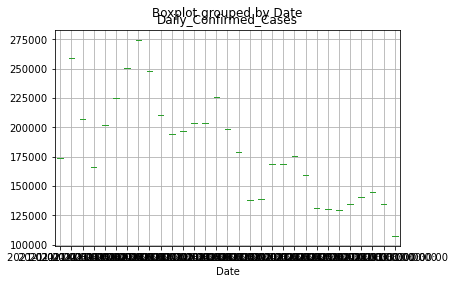

In [308]:
# Next I will create a box plot to see a smaller protion of my data to see if we have any outliers and our 
# what the rates of confirmed casesif like for the month of January

January_Data.boxplot(by ='Date', column ='Daily_Confirmed_Cases')

As seen above it does not seem like we have any outliers as our data shows a steady drop in cases as the month of January goes on. While we do see some dips and spikes through out the month we do see the end result decreasing as the number of new cases seems to get less.

## Upload DataFrame to SQLite

In [309]:
# First I will import the SQLite
import sqlite3

In [310]:
from sqlalchemy import create_engine

In [311]:
# Next I will create the connection using the imported create_engine 
# function and then invoking the connect method on it.
engine = create_engine('sqlite:///covid_states_data.db', echo=True)
sqlite_connection = engine.connect()

2021-11-07 13:16:25,768 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-07 13:16:25,770 INFO sqlalchemy.engine.base.Engine ()
2021-11-07 13:16:25,773 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-07 13:16:25,777 INFO sqlalchemy.engine.base.Engine ()


In [312]:
# Next I will name my SQL table and connect it to my database
sqlite_table = "Covid19_States_Data"
new_Covid_Data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-07 13:17:40,459 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Covid19_States_Data")
2021-11-07 13:17:40,462 INFO sqlalchemy.engine.base.Engine ()
2021-11-07 13:17:40,465 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Covid19_States_Data")
2021-11-07 13:17:40,468 INFO sqlalchemy.engine.base.Engine ()
2021-11-07 13:17:40,476 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Covid19_States_Data" (
	"index" BIGINT, 
	"Date" DATETIME, 
	"AK" FLOAT, 
	"AZ" FLOAT, 
	"CA" FLOAT, 
	"CO" FLOAT, 
	"HI" BIGINT, 
	"ID" FLOAT, 
	"MT" FLOAT, 
	"NM" FLOAT, 
	"NV" FLOAT, 
	"OR" FLOAT, 
	"UT" FLOAT, 
	"WA" FLOAT, 
	"WY" FLOAT, 
	"IA" FLOAT, 
	"IL" FLOAT, 
	"IN" FLOAT, 
	"KS" FLOAT, 
	"MI" FLOAT, 
	"MN" FLOAT, 
	"MO" FLOAT, 
	"ND" FLOAT, 
	"NE" FLOAT, 
	"OH" FLOAT, 
	"OK" FLOAT, 
	"SD" FLOAT, 
	"WI" FLOAT, 
	"AL" FLOAT, 
	"AR" FLOAT, 
	"FL" FLOAT, 
	"GA" FLOAT, 
	"KY" FLOAT, 
	"LA" FLOAT, 
	"MS" FLOAT, 
	"NC" FLOAT, 
	"SC" FLOAT, 
	"TN" FLOAT, 
	"TX" BIGINT, 
	"VA" FLOAT,

In [313]:
# Next we will take a look at the data through the sqlite3 command 
# line viewer to make sure it was properly saved to the SQLite file
sqlite3

<module 'sqlite3' from '/Users/Robyn/opt/anaconda3/lib/python3.8/sqlite3/__init__.py'>

In [314]:
# Next I will open my data frame back up from sql lite
# Read sqlite query results into a pandas DataFrame
df = pd.read_sql_query("select * from Covid19_States_Data", sqlite_connection)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

2021-11-07 13:19:48,560 INFO sqlalchemy.engine.base.Engine select * from Covid19_States_Data
2021-11-07 13:19:48,562 INFO sqlalchemy.engine.base.Engine ()
   index                        Date     AK       AZ       CA      CO   HI  \
0      0  2021-01-01 00:00:00.000000  801.0  10060.0  47189.0  3064.0  241   
1      1  2021-01-02 00:00:00.000000  801.0   8883.0  53341.0  2011.0  169   
2      2  2021-01-03 00:00:00.000000  290.0  17234.0  45352.0  2078.0  149   
3      3  2021-01-04 00:00:00.000000  260.0   5158.0  29633.0  2185.0   89   
4      4  2021-01-05 00:00:00.000000  194.0   5932.0  31440.0  3458.0  123   

       ID     MT      NM  ...   MP     PR    VI  Daily_Confirmed_Cases  \
0  1122.0  389.0  1278.0  ...  2.0  677.0   6.0                 174071   
1  1122.0  389.0  1237.0  ...  2.0  835.0   6.0                 258867   
2   308.0  437.0  1015.0  ...  2.0  237.0   6.0                 207306   
3   798.0  283.0   921.0  ...  2.0  558.0  13.0                 165938   
4  153

In [315]:
# Next I will close the database connection.
sqlite_connection.close()

In [316]:
# Next I will create the connection using the imported create_engine 
# function and then invoking the connect method on it for my January dataframe.
January_Data_engine = create_engine('sqlite:///January_covid_data.db', echo=True)
January_Data_sqlite_connection = January_Data_engine.connect()

2021-11-07 14:02:44,168 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-07 14:02:44,172 INFO sqlalchemy.engine.base.Engine ()
2021-11-07 14:02:44,175 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-07 14:02:44,177 INFO sqlalchemy.engine.base.Engine ()


In [317]:
# Next I will name my SQL table and connect it to my database
January_Data_sqlite_table = "January_Covid19_Data"
January_Data.to_sql(January_Data_sqlite_table, January_Data_sqlite_connection, if_exists='fail')

2021-11-07 14:04:06,414 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("January_Covid19_Data")
2021-11-07 14:04:06,415 INFO sqlalchemy.engine.base.Engine ()
2021-11-07 14:04:06,418 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("January_Covid19_Data")
2021-11-07 14:04:06,419 INFO sqlalchemy.engine.base.Engine ()
2021-11-07 14:04:06,428 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "January_Covid19_Data" (
	"index" BIGINT, 
	"Date" DATETIME, 
	"AK" FLOAT, 
	"AZ" FLOAT, 
	"CA" FLOAT, 
	"CO" FLOAT, 
	"HI" BIGINT, 
	"ID" FLOAT, 
	"MT" FLOAT, 
	"NM" FLOAT, 
	"NV" FLOAT, 
	"OR" FLOAT, 
	"UT" FLOAT, 
	"WA" FLOAT, 
	"WY" FLOAT, 
	"IA" FLOAT, 
	"IL" FLOAT, 
	"IN" FLOAT, 
	"KS" FLOAT, 
	"MI" FLOAT, 
	"MN" FLOAT, 
	"MO" FLOAT, 
	"ND" FLOAT, 
	"NE" FLOAT, 
	"OH" FLOAT, 
	"OK" FLOAT, 
	"SD" FLOAT, 
	"WI" FLOAT, 
	"AL" FLOAT, 
	"AR" FLOAT, 
	"FL" FLOAT, 
	"GA" FLOAT, 
	"KY" FLOAT, 
	"LA" FLOAT, 
	"MS" FLOAT, 
	"NC" FLOAT, 
	"SC" FLOAT, 
	"TN" FLOAT, 
	"TX" BIGINT, 
	"VA" FLO

In [318]:
# Next we will take a look at the data through the sqlite3 command 
# line viewer to make sure it was properly saved to the SQLite file
sqlite3

<module 'sqlite3' from '/Users/Robyn/opt/anaconda3/lib/python3.8/sqlite3/__init__.py'>

In [319]:
# Next I will open my data frame back up from sql lite
# Read sqlite query results into a pandas DataFrame
January_Data_df = pd.read_sql_query("select * from January_Covid19_Data", January_Data_sqlite_connection)

# Verify that result of SQL query is stored in the dataframe
print(January_Data_df.head())

2021-11-07 14:06:35,484 INFO sqlalchemy.engine.base.Engine select * from January_Covid19_Data
2021-11-07 14:06:35,489 INFO sqlalchemy.engine.base.Engine ()
   index                        Date     AK       AZ       CA      CO   HI  \
0      0  2021-01-01 00:00:00.000000  801.0  10060.0  47189.0  3064.0  241   
1      1  2021-01-02 00:00:00.000000  801.0   8883.0  53341.0  2011.0  169   
2      2  2021-01-03 00:00:00.000000  290.0  17234.0  45352.0  2078.0  149   
3      3  2021-01-04 00:00:00.000000  260.0   5158.0  29633.0  2185.0   89   
4      4  2021-01-05 00:00:00.000000  194.0   5932.0  31440.0  3458.0  123   

       ID     MT      NM  ...   MP     PR    VI  Daily_Confirmed_Cases  \
0  1122.0  389.0  1278.0  ...  2.0  677.0   6.0                 174071   
1  1122.0  389.0  1237.0  ...  2.0  835.0   6.0                 258867   
2   308.0  437.0  1015.0  ...  2.0  237.0   6.0                 207306   
3   798.0  283.0   921.0  ...  2.0  558.0  13.0                 165938   
4  15

In [320]:
# Next I will close the database connection.
January_Data_sqlite_connection.close()